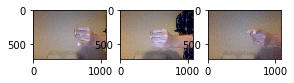

complete


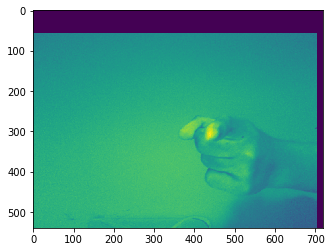

In [18]:
import os
import matplotlib.pyplot as plt
import pandas
import torch
from PIL import Image
import glob
import pandas as pd
import numpy as np
import torchvision.transforms as transforms
import random
import pyaudio
import fileinput

imgs = []

def load_images(file_dir, file_dir_2):
    if(file_dir != ""):
        for file_name in os.listdir(file_dir):
            if(file_name==".DS_Store"):
                continue
            tmp = file_dir + file_name
            pt = os.path.join(tmp)
            imgs.append(Image.open(pt))
    if(file_dir_2 != ""):
        for file_name in os.listdir(file_dir_2):
            if(file_name==".DS_Store"):
                continue
            tmp = file_dir_2 + file_name
            path = os.path.join(tmp)
            imgs.append(Image.open(path))

def list_to_string(l):
    ret = ''
    for j in range(len(l)-1):
        ret += j
        ret += ','
    ret += l[len(l)-1]
    return ret
def manipulate_labels(file_path):
    giv = open(file_path,"r")
    fl = giv.readlines()
    new_lab = ["FLAT", "NATURAL", "SHARP"]
    IDX = 0
    for i in range(len(fl)):
        print(fl[i])
        IDX += 1
        tmp = fl[i].split(',')
        print(tmp)
        l_str = list(tmp)
        TRUE_IDX = int( float(IDX)/float(58) ) % 3
        l_str[0]=new_lab[TRUE_IDX]
        n_str = list_to_string(l_str)
        fl[i]=n_str
        
    print(fl)
    with open(file_path,"w") as writ:
        writ.writelines(fl)
def replace_files():
    with fileinput.FileInput('./data/Labels/tonal_labels_train_and_test.txt', inplace=True, backup='.bak') as file:
        idx = 0
        for line in file:
            if(idx <= 406):
                idx += 1
                continue
            print(line.replace('F','P'), end = '')

DIR = "./data/Image_Training_Note/"
DIR_2 = "./data/Image_Training_Accidental/"
DIR_3 = "./data/Piano_Augmentation/"
DIR_4 = "./data/Image_Testing_Accidental/"
load_images(DIR_2,"")

IDX = 1
for path in imgs:
    if(path==".DS_Store"):
        continue
    if(IDX>=8):
        break
    plt.subplot(2,4,IDX)
    plt.imshow(path)
    IDX += 1
plt.show()

augment_images = transforms.Compose([
                    transforms.Grayscale(1),
                    transforms.RandomAffine(degrees = 0, translate = (random.uniform(0,0.5),random.uniform(0,0.4))),
                    transforms.RandomHorizontalFlip(0.15),
                    transforms.Resize((540,720))
                    #transforms.ToTensor(),
                ])
augment_images_two =  transforms.Compose([
                    transforms.Grayscale(1),
                    transforms.RandomAffine(degrees = 0, translate = (random.uniform(0,0.5),random.uniform(0,0.4))),
                    #transforms.RandomHorizontalFlip(0.15),
                    transforms.Resize((540,720))
                    #transforms.ToTensor(),
                ])
IDX = 1
files_one = os.listdir(DIR)
files_two = os.listdir(DIR_2)
files_three = os.listdir(DIR_4)
#manipulate_labels("./data/Labels/tonal_labels_train.txt")
#replace_files()
print("complete")
'''
for f in files_one:
    if(f==".DS_Store"):
        continue
    print(f)
    sv = Image.open(os.path.join(DIR,f))
    conv_sv = augment_images(sv)
    conv_sv.save(os.path.join(DIR,f))
for f in files_two:
    print(f)
    sv = Image.open(f)
    conv_sv = augment_images(sv)
    sv.thumbnail(540,720)
    conv_sv.save(f)
'''
'''
for f in files_two:
    tmp = f
    tmp2 = f.replace("note","accidental")
    print(tmp2)
    os.rename(DIR_2 + tmp, DIR_2 + tmp)
print('\n')
for f in files_three:
    tmp = f
    tmp2 = f.replace("note","accidental")
    print(tmp2)
    os.rename(DIR_4 + tmp, DIR_4 + tmp2)
'''

for image in imgs:
        for i in range(100):
            res = augment_images_two(image.convert("LA"))
            plt.imshow(res)
            res.save("augmented_image_accidental_{}_{}.png".format(IDX,"grayscale"))
            IDX += 1

plt.show()



